### Imports

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from smote import smote_sampling
from train_and_pred import train_and_predict
from accuracy_metrics import calculate_metrics 
from roc import roc_plot
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score 


/Users/kyledennis/anaconda3/lib/python3.10/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


### Data Import and Cleaning

In [2]:
# read in data
data = pd.read_csv('dataset.csv')

# check is for nulls
print(data.isnull().values.any())
print('^ No nulls')

# obtain X and y
X = data[["Time", "Amount", "V1", "V2"]]
y = data['Class']

# find fraud proportion
# fraudCount = len(data[data['Class'] == 1])
fraud_count = (y == 1).sum()
fraud_percentage = (fraud_count/len(X))*100 
fraud_percentage_rounded = round(fraud_percentage, 4)

# print fraud distribution
print('There are ' + str(fraud_count) + ' fraudulent transactions- about ' + str(fraud_percentage_rounded) + ' percent of the dataset.')

False
^ No nulls
There are 492 fraudulent transactions- about 0.1727 percent of the dataset.


### Apply SMOTE sampling

In [3]:
# Scale date before splitting
# Scale time and amount features(PC's were already scaled)in training and test data
scaler = StandardScaler()
X_scaled = X.copy() 
X_scaled[['Time', 'Amount']] = scaler.fit_transform(X[['Time', 'Amount']])

# Split scaled data into training set(80%) and test set(20%) using stratified splitting
X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, stratify=y, random_state=7)

# apply SMOTE to scaled training data- have new minority class be about 30 percent of the majority class
X_train_scaled_sampled, y_train_sampled = smote_sampling(X_train_scaled, y_train, sample_proportion=0.3)

# find new fraud proportion
fraud_count_new = (y_train_sampled == 1).sum()
fraud_percentage_new = (fraud_count_new/len(X_train_scaled_sampled))*100 
fraud_percentage_rounded_new = round(fraud_percentage_new, 4)

# print new fraud distribution
print('There are ' + str(fraud_count_new) + ' fraudulent transactions in the training data- about ' + str(fraud_percentage_rounded_new) + ' percent of the dataset.')


There are 68235 fraudulent transactions in the training data- about 23.0768 percent of the dataset.


### Logistic Regression

{'accuracy': 0.9984375548611355, 'precision': 0.8461538461538461, 'recall': 0.11224489795918367}
0.8595164043388881


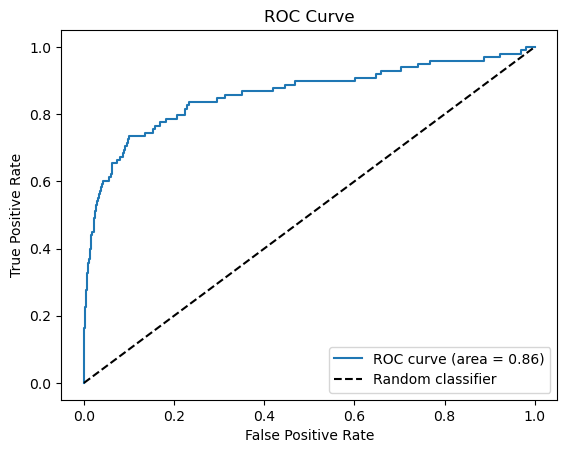

In [4]:
# Initialize base model
lr = LogisticRegression(random_state=22)

# Fit model and get predictions
y_pred_prob_lr, y_pred_lr = train_and_predict(lr, X_train_scaled, y_train, X_test_scaled)

# Get accuracy metrics
lr_metrics = calculate_metrics(y_test, y_pred_lr)
print(lr_metrics)
lr_auc = roc_auc_score(y_test, y_pred_prob_lr)
print(lr_auc)

# Plot auc
roc_plot(y_test, y_pred_prob_lr, lr_auc)

### Random Forest

### Gradient Boosting